In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import cv2

In [3]:
# DISC score computation function
def compute_disc(pred, label):
    intersection = np.sum(label * pred)
    return (2.0 * intersection) / (np.sum(label) + np.sum(pred))


# Calculate IoU
def comput_iou(pred, label):
    intersection = np.sum(label * pred)
    union = np.sum(label) + np.sum(pred) - intersection
    return intersection / union

In [4]:
# Load images and labels
img_path = "processed_data/bccd/images/0a3b53c7-e7ab-4135-80aa-fd2079d727d6.npy"
lbl_path = "processed_data/bccd/labels/0a3b53c7-e7ab-4135-80aa-fd2079d727d6.npy"

img = np.load(img_path)
lbl = np.load(lbl_path)

print("Input image shape:", img.shape)
print("Label image shape:", lbl.shape)

Input image shape: (512, 512, 3)
Label image shape: (512, 512)


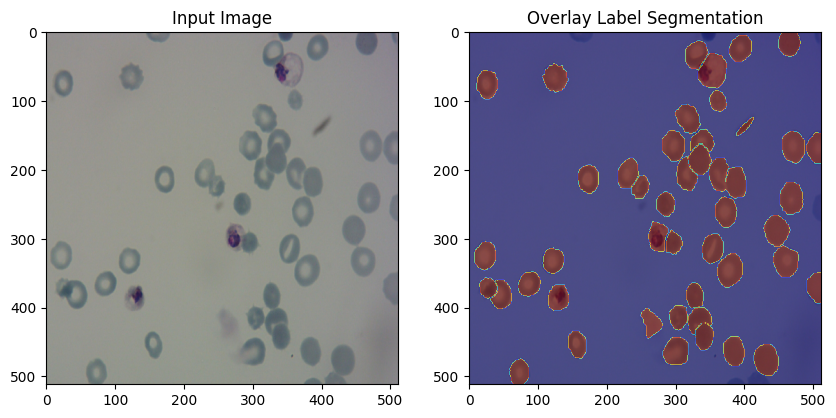

In [4]:
# Visualize input image and overlay label segmentation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(lbl, cmap="jet", alpha=0.5)  # Overlay label on the image
plt.title("Overlay Label Segmentation")
plt.show()

In [11]:
# Flatten the image for clustering
flat_img = img.reshape((-1, img.shape[-1]))
flat_lbl = lbl.reshape(-1)

# DBSCAN for segmentation
db = DBSCAN(eps=10, min_samples=50)
db.fit(flat_img)
segmentation = db.labels_.reshape(img.shape[:-1])

# Map labels from DBSCAN to binary values (0 or 1)
segmented_img = np.where(segmentation >= 0, 1, 0)

# Evaluate using DISC score
label_binary = (lbl > 0).astype(int)
pred_binary = (segmented_img > 0).astype(int)
disc_score = compute_disc(pred_binary, label_binary)
print(f"DISC Score: {disc_score}")

# Evaluate using IoU
iou_score = comput_iou(pred_binary, label_binary)
print(f"IoU Score: {iou_score}")

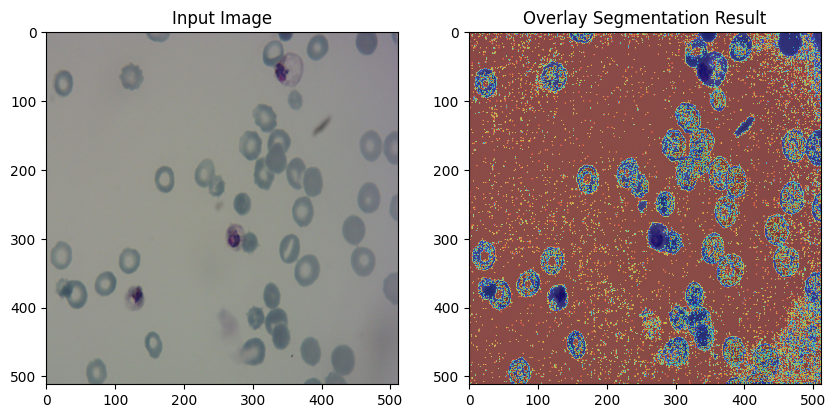

In [10]:
# Visualize overlay segmentation results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(segmented_img, cmap="jet", alpha=0.5)  # Overlay DBSCAN segmentation
plt.title("Overlay Segmentation Result")
plt.show()

In [26]:
from sklearn.cluster import MeanShift

# Flatten the image for clustering
flat_img = img.reshape((-1, img.shape[-1]))
flat_lbl = lbl.reshape(-1)

# Mean Shift for segmentation
ms = MeanShift(bandwidth=20, bin_seeding=True)
ms.fit(flat_img)
segmentation = ms.labels_.reshape(img.shape[:2])

# Map labels from Mean Shift to binary values (0 or 1)
segmented_img = segmentation


# Evaluate Mean Shift results by using DISC score and IoU
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2.0 * intersection) / (np.sum(y_true) + np.sum(y_pred))


# Evaluate using DISC score
label_binary = (lbl > 0).astype(int)
pred_binary = (segmented_img > 0).astype(int)
disc_score = compute_disc(pred_binary, label_binary)
print(f"DISC Score: {disc_score}")

# Evaluate using IoU
iou_score = comput_iou(pred_binary, label_binary)
print(f"IoU Score: {iou_score}")

DISC Score: 0.8340806141149621
IoU Score: 0.715384463293592


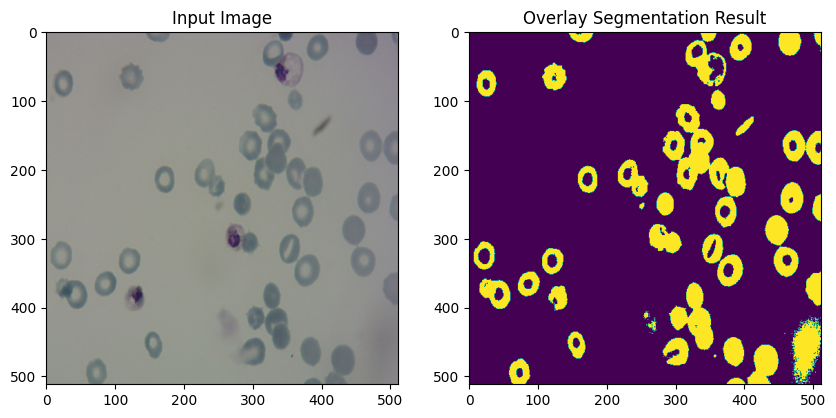

In [30]:
# Visualize overlay segmentation results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(pred_binary)  # Overlay DBSCAN segmentation
plt.title("Overlay Segmentation Result")
plt.show()

In [34]:
from sklearn.mixture import GaussianMixture


# Flatten the image for clustering
flat_img = img.reshape((-1, img.shape[-1]))
flat_lbl = lbl.reshape(-1)

# Fit GMM to the data
gmm = GaussianMixture(n_components=2, covariance_type="tied", random_state=0)
gmm.fit(flat_img)
segmentation = gmm.predict(flat_img).reshape(img.shape[:2])

# Since GMM gives labels 0 or 1, we can directly use it as a binary mask
segmentation_mapped = segmentation


# Evaluate Mean Shift results by using DISC score and IoU
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2.0 * intersection) / (np.sum(y_true) + np.sum(y_pred))


# Evaluate using DISC score
label_binary = (lbl > 0).astype(int)
pred_binary = (segmented_img > 0).astype(int)
disc_score = compute_disc(pred_binary, label_binary)
print(f"DISC Score: {disc_score}")

# Evaluate using IoU
iou_score = comput_iou(pred_binary, label_binary)
print(f"IoU Score: {iou_score}")

DISC Score: 0.8298272999826557
IoU Score: 0.709149427234421


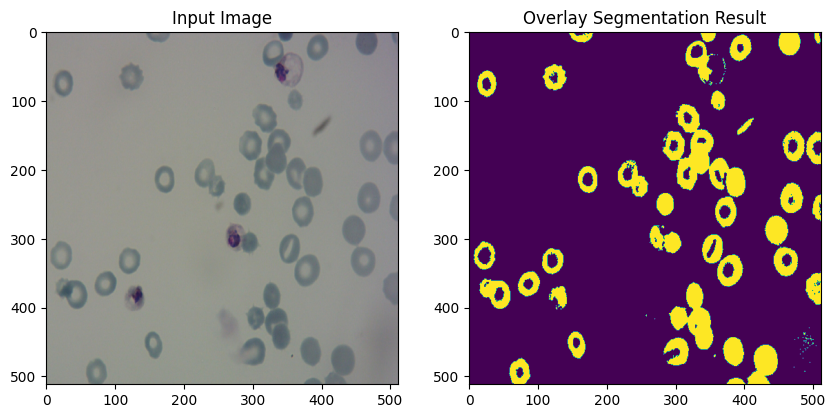

In [35]:
# Visualize overlay segmentation results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(pred_binary)  # Overlay DBSCAN segmentation
plt.title("Overlay Segmentation Result")
plt.show()

In [36]:
from sklearn.cluster import OPTICS

# Flatten the image for clustering
flat_img = img.reshape((-1, img.shape[-1]))
flat_lbl = lbl.reshape(-1)

# OPTICS for segmentation
optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.1)
optics.fit(flat_img)
segmentation = optics.labels_.reshape(img.shape[:2])

# Map labels from OPTICS to binary values (0 or 1)
segmentation_mapped = np.where(segmentation >= 0, 1, 0)


# Evaluate Mean Shift results by using DISC score and IoU
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2.0 * intersection) / (np.sum(y_true) + np.sum(y_pred))


# Evaluate using DISC score
label_binary = (lbl > 0).astype(int)
pred_binary = (segmented_img > 0).astype(int)
disc_score = compute_disc(pred_binary, label_binary)
print(f"DISC Score: {disc_score}")

# Evaluate using IoU
iou_score = comput_iou(pred_binary, label_binary)
print(f"IoU Score: {iou_score}")

DISC Score: 0.8298272999826557
IoU Score: 0.709149427234421


/opt/homebrew/anaconda3/envs/ssl-in-medical-image-segmentation/lib/python3.10/site-packages/sklearn/cluster/_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
